### Massey Ratings
https://penaltyblog.readthedocs.io/en/latest/ratings/massey_ratings.html

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import penaltyblog as pb

In [3]:
DATA_DIR = os.path.join(os.getcwd(), 'data/')
CHART_DIR = os.path.join(os.getcwd(), 'charts/')

In [4]:
#data_file = './data/FMF_TA_2021.csv'
data_file = './data/lmf-ac-2021-22.csv'
df = pd.read_csv(data_file, index_col=0)
df.head()

,AMÉ,ATL,ASL,CAZ,GUA,JUÁ,LEÓ,MAZ,MON,NEC,PAC,PUE,QUE,SAN,TIJ,TOL,UNL,UNM
Home \ Away,,,,,,,,,,,,,,,,,,
América,—,0–2,2–3,0–0,0–0,3–0,2–0,2–0,0–0,2–1,1–3,2–0,1–1,2–1,2–0,3–0,1–0,2–0
Atlas,0–1,—,1–0,0–0,1–1,2–0,2–0,1–2,2–1,2–1,0–1,0–1,2–0,2–1,0–2,0–0,1–1,0–0
Atlético San Luis,0–1,2–6,—,0–0,2–2,0–1,2–0,1–0,1–1,0–2,0–2,2–1,1–1,1–3,4–1,0–1,0–3,2–0
Cruz Azul,2–1,1–0,0–1,—,0–1,1–0,0–1,0–2,1–1,1–2,1–1,1–3,2–0,1–2,2–0,4–0,1–1,2–1
Guadalajara,0–0,0–1,1–2,1–1,—,2–2,0–3,3–0,1–3,2–1,1–0,2–3,1–1,1–0,2–1,2–0,1–3,3–1


In [5]:
df.index = df.columns
rows = []
for i in df.index:
    for c in df.columns:
        if i == c: continue
        score = df.loc[i, c]
        if score == '—': continue
        ssplit = score.split('–')
        rows.append([i, c, ssplit[0], ssplit[1]])
df = pd.DataFrame(rows, columns = ['team_home', 'team_away', 
                                   'fthg', 'ftag'])
df.head()

,team_home,team_away,fthg,ftag
0,AMÉ,ATL,0,2
1,AMÉ,ASL,2,3
2,AMÉ,CAZ,0,0
3,AMÉ,GUA,0,0
4,AMÉ,JUÁ,3,0


In [6]:
df.home_score = df['fthg'].astype('int')
df.away_score = df['ftag'].astype('int')

In [7]:
df.dtypes

team_home    object
team_away    object
fthg         object
ftag         object
dtype: object

In [8]:
massey = pb.ratings.Massey(df["fthg"], df["ftag"], 
                           df["team_home"], df["team_away"])
massey.get_ratings()

,team,rating,offence,defence
0,UNL,0.611111,1.080372,-0.469261
1,AMÉ,0.5,0.712316,-0.212316
2,ATL,0.472222,0.620302,-0.14808
3,PAC,0.361111,0.845997,-0.484886
4,CAZ,0.194444,0.606413,-0.411969
5,MON,0.194444,0.575163,-0.380719
6,SAN,0.194444,0.825163,-0.630719
7,PUE,0.166667,0.60815,-0.441483
8,GUA,0.111111,0.517872,-0.406761
9,LEÓ,0.027778,0.49183,-0.464052


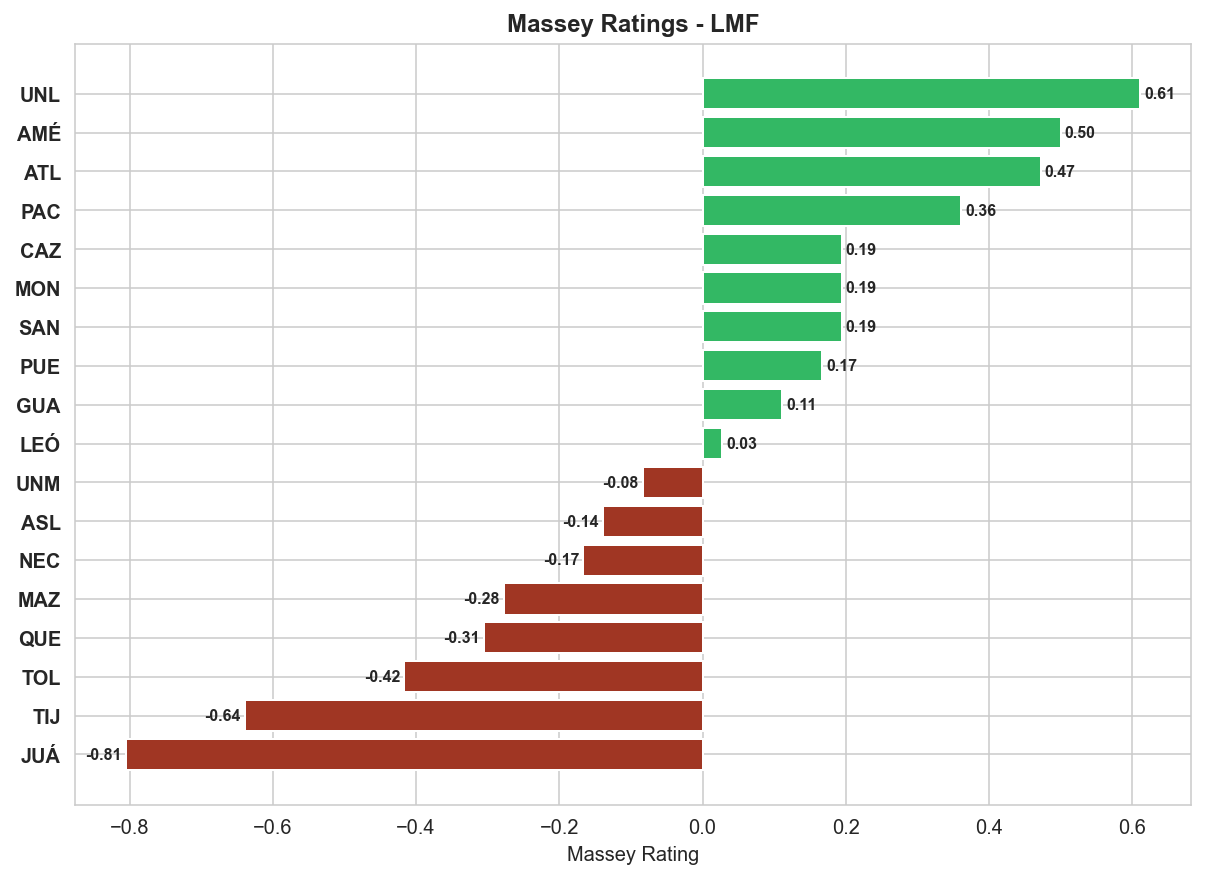

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [10, 7]
sns.set_style("whitegrid")

massey = pb.ratings.Massey(df["fthg"], df["ftag"], df["team_home"], 
                           df["team_away"])
ratings = pd.DataFrame(massey.get_ratings())
ratings["colours"] = np.where(ratings["rating"] > 0, "#33b864", 
                              "#a03623")
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["rating"]
ax.barh(y_pos, performance, align="center", color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel("Massey Rating")
ax.set_title("Massey Ratings - LMF", fontweight="bold")

rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 2
    ha = "left"

    if x_value < 0:
        space *= -1
        ha = "right"

    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords="offset points",
        va="center",
        ha=ha,
        fontsize=8,
        fontweight="bold",
    )

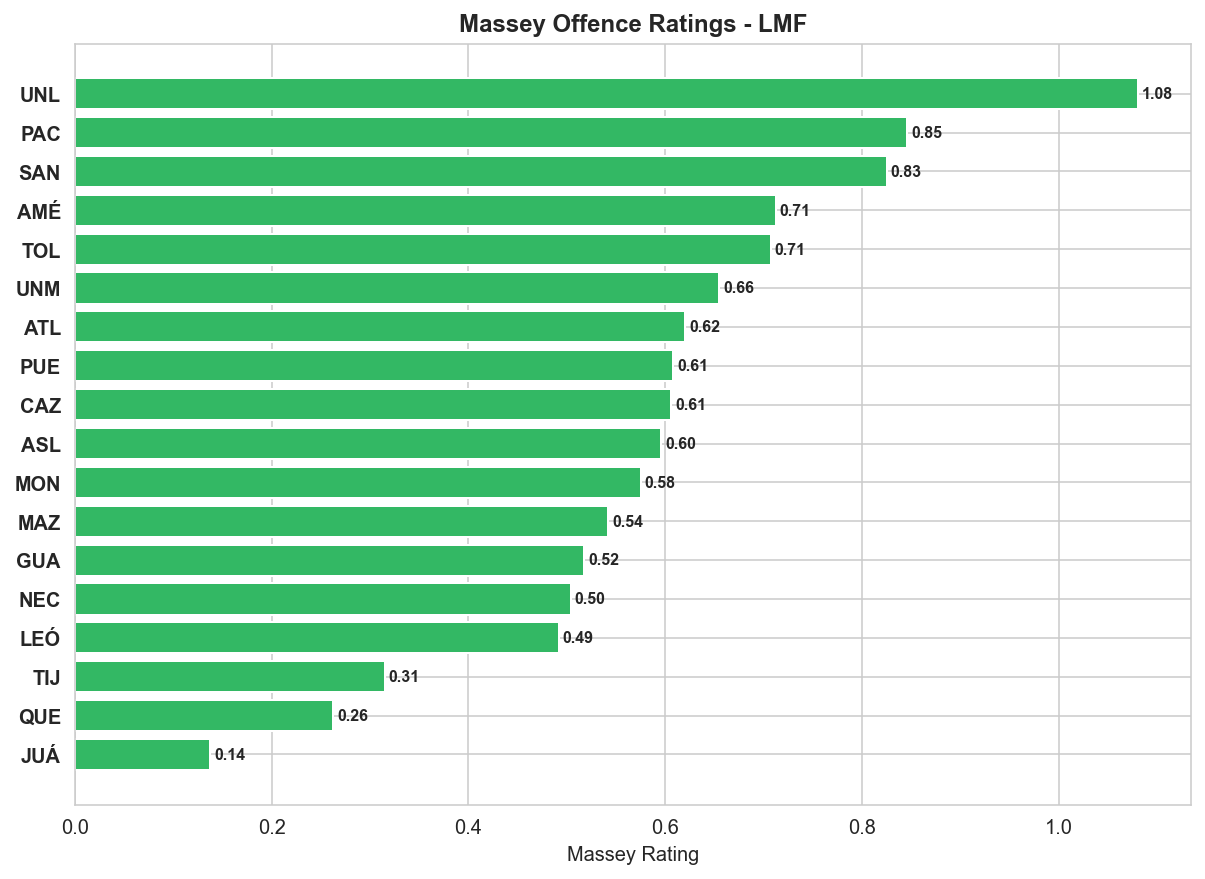

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [10, 7]
sns.set_style("whitegrid")

massey = pb.ratings.Massey(df["fthg"], df["ftag"], 
                           df["team_home"], df["team_away"])
ratings = pd.DataFrame(massey.get_ratings())
ratings["colours"] = np.where(ratings["offence"] > 0, "#33b864", 
                              "#a03623")
ratings = ratings.sort_values("offence", ascending=False)
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["offence"]
ax.barh(y_pos, performance, align="center", color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel("Massey Rating")
ax.set_title("Massey Offence Ratings - LMF", fontweight="bold")

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 2
    ha = "left"

    if x_value < 0:
        space *= -1
        ha = "right"

    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords="offset points",
        va="center",
        ha=ha,
        fontsize=8,
        fontweight="bold",
    )

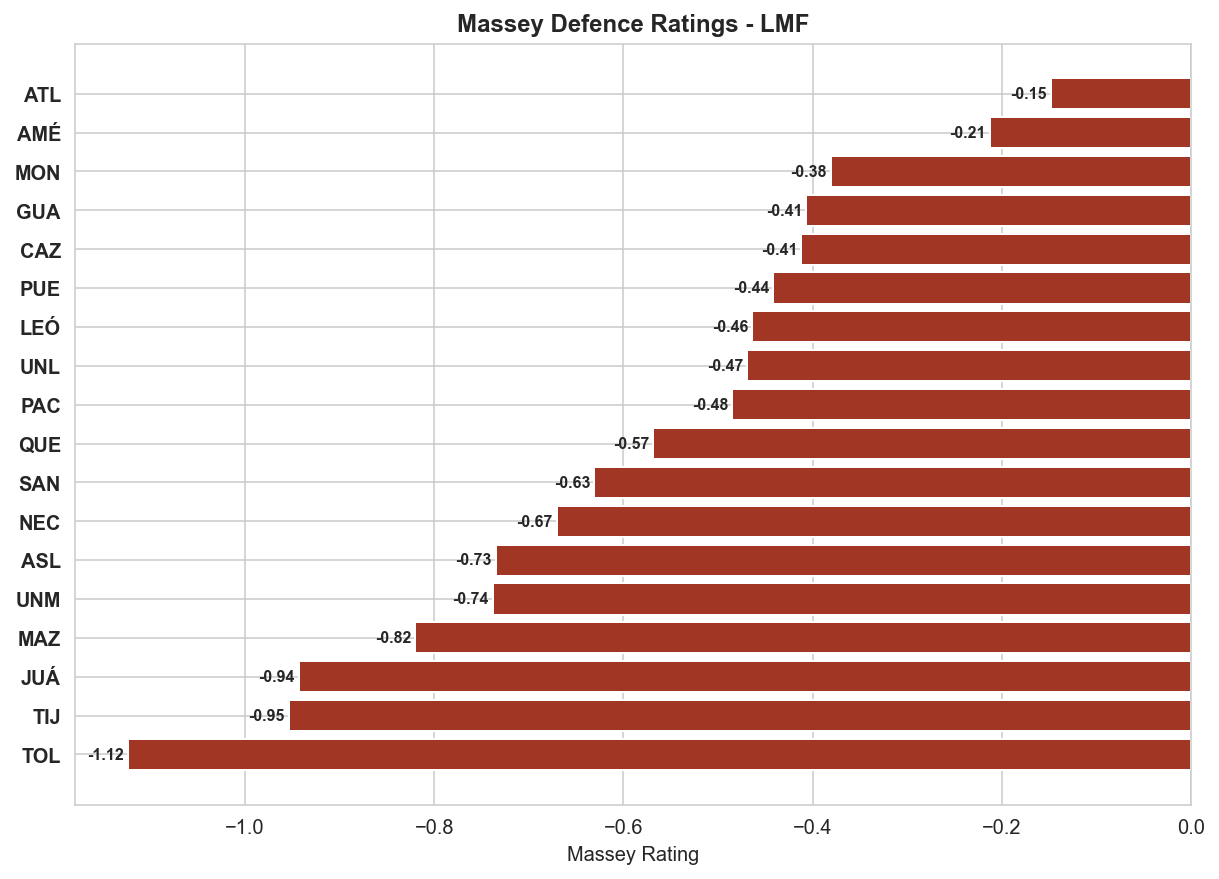

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [10, 7]
sns.set_style("whitegrid")

massey = pb.ratings.Massey(df["fthg"], df["ftag"], 
                           df["team_home"], df["team_away"])
ratings = pd.DataFrame(massey.get_ratings())
ratings["colours"] = np.where(ratings["defence"] > 0, 
                              "#33b864", "#a03623")
ratings = ratings.sort_values("defence", ascending=False)
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["defence"]
ax.barh(y_pos, performance, align="center", color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel("Massey Rating")
ax.set_title("Massey Defence Ratings - LMF", fontweight="bold")

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 2
    ha = "left"

    if x_value < 0:
        space *= -1
        ha = "right"

    label = "{:.2f}".format(x_value)

    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords="offset points",
        va="center",
        ha=ha,
        fontsize=8,
        fontweight="bold",
    )